In [4]:
import tensorflow as tf 
from tensorflow import keras
tf.__version__

'2.10.0'

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
# load keras data set
(x_train, y_train),(x_test, y_test) =keras.datasets.mnist.load_data()

In [7]:
# check the shapes 
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

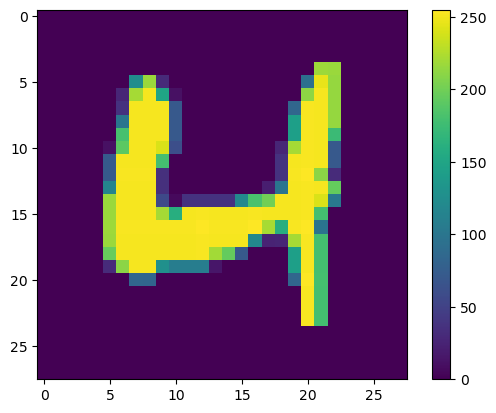

In [13]:
# display random x_train, y_train
np.random.seed(0)
ran_num=np.random.randint(0,60000)
plt.figure()
plt.imshow(x_train[ran_num])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# check the y label 
y_train[ran_num]

4

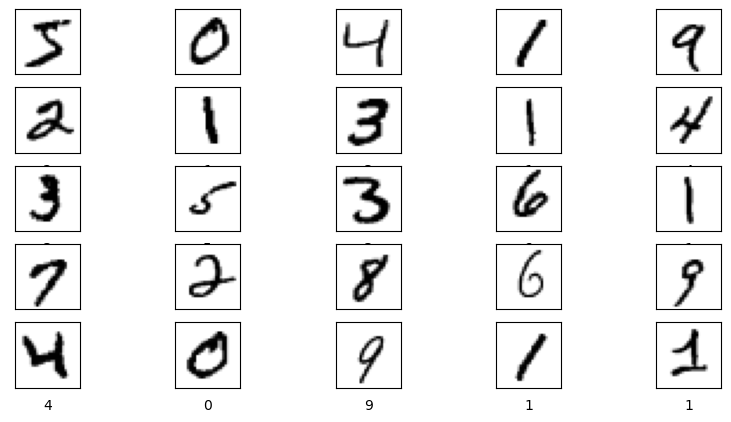

In [18]:
# disaplay first 25 images (5,5) with lables 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i] , cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [16]:
# scaling images 
x_train = x_train /255.0
x_test = x_test / 255.0